In [1]:
!python han-font.py
exec(open('han-font.py').read())
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

data=pd.read_csv('모바일뱅킹.csv', encoding='CP949')

In [2]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,y
0,4,6,6,6,5,7,7,7,4,4,...,5,7,4,4,6,4,7,7,7,2
1,5,6,5,4,6,7,2,7,6,6,...,6,6,4,6,7,6,5,4,5,4
2,5,7,6,3,2,7,3,4,5,5,...,7,7,5,5,5,3,5,4,4,3
3,4,3,3,3,4,5,5,6,6,5,...,7,7,7,6,6,7,3,5,5,2
4,7,7,7,2,1,2,1,3,3,3,...,6,5,3,2,2,2,6,6,6,1


In [3]:
#[1] data set : train-set, test-set 분류
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

## 훈련용, 테스트용 자료 분류 : random
y_target=data['y']
x_data=data.drop(['y'],axis=1,inplace=False)

In [4]:
x_train, x_test, y_train, y_test= train_test_split(x_data, y_target, test_size=0.2, random_state=156)
print('훈련 데이터의 크기 :',x_train)
print('테스트 데이터의 크기 :',x_test)

훈련 데이터의 크기 :     x1  x2  x3  x4  x5  x6  x7  x8  x9  x10  ...  x15  x16  x17  x18  x19  \
16   7   5   5   5   6   7   4   5   6    5  ...    7    6    6    6    5   
31   6   7   7   4   7   7   7   7   7    7  ...    7    7    7    7    7   
18   6   6   6   5   1   7   4   4   5    5  ...    7    1    1    1    2   
30   7   6   7   4   3   7   7   3   7    5  ...    7    7    7    4    4   
54   5   5   7   4   3   5   4   7   7    4  ...    7    7    6    3    3   
20   3   3   3   3   7   7   6   7   6    4  ...    5    5    5    5    5   
15   5   6   3   5   2   6   5   6   6    4  ...    6    5    5    6    5   
32   6   6   6   4   2   7   3   5   2    3  ...    5    5    5    3    4   
50   6   6   6   6   6   6   7   7   7    7  ...    7    6    6    7    7   
33   7   7   5   2   3   7   3   4   7    3  ...    7    7    7    3    3   
55   6   7   6   2   5   7   6   7   6    6  ...    7    6    6    4    5   
21   7   7   7   5   5   7   7   5   7    7  ...    7    7    5

In [4]:
# 행렬산점도와 상관계수
data_train=x_train.join(y_train)
sns.pairplot(data = data_train)
data_train.corr()

NameError: name 'x_train' is not defined

In [5]:
#[2] train-set을 이용한 다중회귀모형 분석
data_train=x_train.join(y_train)
fit_train=smf.ols('y_train~x_train', data=data_train).fit()
print(fit_train.summary())

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     16.73
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           1.54e-09
Time:                        05:24:47   Log-Likelihood:                -32.390
No. Observations:                  48   AIC:                             114.8
Df Residuals:                      23   BIC:                             161.6
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -15.4133      1.933     -7.975      

In [6]:
data_train.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,y
16,7,5,5,5,6,7,4,5,6,5,...,6,6,6,5,6,5,6,2,3,3
31,6,7,7,4,7,7,7,7,7,7,...,7,7,7,7,7,7,7,3,3,7
18,6,6,6,5,1,7,4,4,5,5,...,1,1,1,2,3,4,2,1,4,2
30,7,6,7,4,3,7,7,3,7,5,...,7,7,4,4,6,5,6,7,7,5
54,5,5,7,4,3,5,4,7,7,4,...,7,6,3,3,3,3,7,7,7,1


In [7]:
# vif-통계량 계산
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

y, X = dmatrices('y_train ~ x_train', data=data_train, return_type = 'dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,380.548499,Intercept
1,4.537335,x_train[0]
2,4.083489,x_train[1]
3,4.186943,x_train[2]
4,2.321462,x_train[3]
5,3.312389,x_train[4]
6,1.919857,x_train[5]
7,2.878041,x_train[6]
8,3.458910,x_train[7]
9,2.323554,x_train[8]


In [8]:
#[3] 다중공선성 제거를 위한 변수선택방법(후진법)
y=y_train
X=x_train

## 변수선택법(backward)
def backward(X, y, level, verbose=False): #후진선택법
    included=list(X.columns)    #선택된 변수를 저장할 리스트
    while True:
        changed=False
        if  (len(included)==1):
            model=sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        else:
            model=sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pval=model.pvalues.iloc[1:]
        worst_pval=pval.max()

        if worst_pval > level:  #유의수준과 p-value를 비교해서 작으면 해당 변수를 모형에 포함
            changed = True
            worst_X=pval.idxmax()
            included.remove(worst_X)

            if verbose:
                print('DROP{:20} with p-val{:25}'.format(worst_X, worst_pval))
        if not changed:
            break
    return included      #최종 선택 변수 출력

backward(X, y, 0.05, verbose=True)    #데이터의 반응변수와 데이터 이름 입력

DROPx13                  with p-val       0.9630699109477205
DROPx12                  with p-val       0.9772612198623444
DROPx23                  with p-val       0.8503686725439825
DROPx5                   with p-val       0.7532873603658539
DROPx24                  with p-val       0.7523915161127827
DROPx18                  with p-val       0.7277908594148736
DROPx20                  with p-val       0.5721923050242743
DROPx22                  with p-val       0.7132427510644663
DROPx17                  with p-val       0.4812385663050699
DROPx21                  with p-val       0.3282472530987046
DROPx11                  with p-val       0.3230131264766204
DROPx3                   with p-val       0.1573376580253688
DROPx19                  with p-val      0.24186006370674112
DROPx6                   with p-val      0.11146612230802971
DROPx9                   with p-val      0.07205455568391747
DROPx4                   with p-val      0.08502718061941424
DROPx2                  

['x1', 'x7', 'x8', 'x10', 'x14', 'x15', 'x16']

In [9]:
# 후진법에 의한 유의하지 않은 변수 생략
x_train2 = x_train.drop(['x13', 'x12', 'x23', 'x5', 'x24',
                         'x18', 'x20', 'x22', 'x17', 'x21',
                         'x11', 'x3', 'x19', 'x6', 'x9', 'x4', 'x2'],axis=1,inplace=False)
# = x_train.loc[:,['x1', 'x7', 'x8', 'x10', 'x14', 'x15', 'x16' ]]
data_train2=x_train.join(y_train)
fit_train2=smf.ols('y_train~x_train2', data=data_train2).fit()
print(fit_train2.summary())

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     57.80
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           6.40e-19
Time:                        05:24:52   Log-Likelihood:                -44.559
No. Observations:                  48   AIC:                             105.1
Df Residuals:                      40   BIC:                             120.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -13.9870      1.363    -10.261      

In [10]:
x_train2.head()

,x1,x7,x8,x10,x14,x15,x16
16,7,4,5,5,7,7,6
31,6,7,7,7,7,7,7
18,6,4,4,5,7,7,1
30,7,7,3,5,6,7,7
54,5,4,7,4,1,7,7


In [11]:
# test-set을 예측하기 위해 학습모형에 없는 변수 제거
x_test2 = x_test.drop(['x13', 'x12', 'x23', 'x5', 'x24',
                      'x18', 'x20', 'x22', 'x17', 'x21',
                      'x11', 'x3', 'x19', 'x6', 'x9', 'x4', 'x2'],axis=1,inplace=False)
# = x_test2.loc[:,['x1', 'x7', 'x8', 'x10', 'x14', 'x15', 'x16' ]]

In [12]:
# Linear Regression OLS로 학습/예측평가 수행. 
reg= LinearRegression()
reg.fit(x_train2 ,y_train )
y_preds= reg.predict(x_test2)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

In [13]:
# MSE, RMSE, R^2, 설명분산점수(적합모형의 편향성 평가 : 0에 가까워야)
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 2.111 , RMSE : 1.453
Variance score : 0.146


In [14]:
# [4]
# train-set reindex
data_train3=data_train.reset_index().drop(['index'], axis=1, inplace=False)
data_train3.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,y
0,7,5,5,5,6,7,4,5,6,5,...,6,6,6,5,6,5,6,2,3,3
1,6,7,7,4,7,7,7,7,7,7,...,7,7,7,7,7,7,7,3,3,7
2,6,6,6,5,1,7,4,4,5,5,...,1,1,1,2,3,4,2,1,4,2
3,7,6,7,4,3,7,7,3,7,5,...,7,7,4,4,6,5,6,7,7,5
4,5,5,7,4,3,5,4,7,7,4,...,7,6,3,3,3,3,7,7,7,1


In [15]:
# 다중공선성 제거를 위한 PCA수행
# X-Y변수 추출
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
x = x_train
# 표준화(Z)
x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

In [16]:
# PCA모듈설치 및 PCA분석+주성분의 회귀계수를 데이터프레임으로 구성
from sklearn.decomposition import PCA
pca = PCA(n_components=9)   # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = 
                           ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7', 'PC8', 'PC9'])
principalDf.head()   # 주성분들의 점수

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.837903,0.811865,0.302896,0.865092,-1.575929,0.308363,0.834821,0.228170,0.838689
1,-3.670319,-1.544701,1.601641,0.069209,-0.515734,-0.540594,1.262401,0.995586,0.550466
2,2.185209,4.964951,-3.834424,-1.667829,1.435644,1.194361,0.945531,0.690479,-1.255352
3,0.331399,-2.148657,-1.427858,-0.685616,-0.945581,0.427035,0.676515,-0.047651,-0.105584
4,6.908030,-3.458597,1.707233,-0.419003,-1.543667,1.428070,0.173123,1.088632,-0.152547


In [17]:
# 각 주성분의 설명력
print(pca.explained_variance_ratio_)
 # 누적설명력
print(sum(pca.explained_variance_ratio_))

[0.19171385 0.16141056 0.11159085 0.08837884 0.06746586 0.05277534
 0.04847686 0.04263884 0.0390553 ]
0.8035063162224182


In [18]:
# 주성분분석 : 고유벡터(주성분 식의 계수값)
print(pca.components_) 

[[-0.08392858 -0.09850562  0.02637049 -0.10926036 -0.20092747 -0.20950002
  -0.10341146  0.01607888 -0.05870581 -0.23933288 -0.03846139 -0.36312297
  -0.37490634 -0.37337137 -0.23407892 -0.12888063 -0.13317555 -0.28169232
  -0.33503535 -0.1950908  -0.24020019  0.00386219  0.10286908  0.11953275]
 [-0.15354794 -0.22660633 -0.33202132 -0.11395419 -0.1047735   0.09901248
  -0.11976288 -0.17405484 -0.11350375 -0.18651917  0.05608839  0.08299899
   0.18520819  0.13852587 -0.04841884 -0.28773736 -0.30543556 -0.04798712
  -0.03701855 -0.14164856  0.02022364 -0.3715784  -0.40920362 -0.34225481]
 [-0.38861488 -0.33453663 -0.21341829 -0.09538713  0.29770726 -0.12441625
   0.17408843  0.36828537  0.21949617  0.03257178  0.28306148 -0.19783973
  -0.12861776 -0.13030148 -0.17840737  0.14249046  0.13568553  0.26885602
   0.17706535 -0.06275386  0.09064959  0.00639346 -0.04651505 -0.14766172]
 [ 0.0769858  -0.1052393  -0.22178386  0.18768423  0.10678517 -0.2094188
  -0.21996444 -0.14020803 -0.4107163

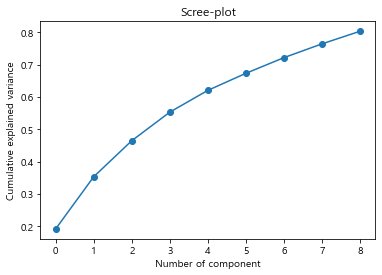

In [19]:
# screen-plot
import numpy as np
import matplotlib.pylab as plt
exp_var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.title('Scree-plot')
plt.xlabel('Number of component')
plt.ylabel('Cumulative explained variance')
plt.plot(exp_var_cum, 'o-')

In [20]:
# 주성분을 6개로 정하고 다시 PCA분석
from sklearn.decomposition import PCA
pca = PCA(n_components=6)   
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = 
                           ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
print(pca.components_) 

[[-0.08392858 -0.09850562  0.02637049 -0.10926036 -0.20092747 -0.20950002
  -0.10341146  0.01607888 -0.05870581 -0.23933288 -0.03846139 -0.36312297
  -0.37490634 -0.37337137 -0.23407892 -0.12888063 -0.13317555 -0.28169232
  -0.33503535 -0.1950908  -0.24020019  0.00386219  0.10286908  0.11953275]
 [-0.15354794 -0.22660633 -0.33202132 -0.11395419 -0.1047735   0.09901248
  -0.11976288 -0.17405484 -0.11350375 -0.18651917  0.05608839  0.08299899
   0.18520819  0.13852587 -0.04841884 -0.28773736 -0.30543556 -0.04798712
  -0.03701855 -0.14164856  0.02022364 -0.3715784  -0.40920362 -0.34225481]
 [-0.38861488 -0.33453663 -0.21341829 -0.09538713  0.29770726 -0.12441625
   0.17408843  0.36828537  0.21949617  0.03257178  0.28306148 -0.19783973
  -0.12861776 -0.13030148 -0.17840737  0.14249046  0.13568553  0.26885602
   0.17706535 -0.06275386  0.09064959  0.00639346 -0.04651505 -0.14766172]
 [ 0.0769858  -0.1052393  -0.22178386  0.18768423  0.10678517 -0.2094188
  -0.21996444 -0.14020803 -0.4107163

In [21]:
 # 누적설명력
print(sum(pca.explained_variance_ratio_))

0.6733353138978313


In [22]:
# 주성분의 적절한 이름을 붙여 새로운 변수 생성
data_train3['security']=principalDf['PC1']     # 보안(security) : x12, x13, x14, x19
data_train3['introduction']=principalDf['PC2'] # (시스템의)도입(introduction): (x3), x22, x23, x24
data_train3['promotion']=principalDf['PC3']    # 홍보활동(marketing):x1, x2, (x5), x8
data_train3['variety']=principalDf['PC4']      # 다양성(variety) :x9, (x10), (x19), x20, (x21)
data_train3['utility']=principalDf['PC5']      # 유용성(utility) : x8, x10, x11, x16, x17, x21
data_train3['education']=principalDf['PC6']    # 교육(education): x4, x5, x16
data_train3.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x22,x23,x24,y,security,introduction,promotion,variety,utility,education
0,7,5,5,5,6,7,4,5,6,5,...,6,2,3,3,-0.837903,0.811865,0.302896,0.865092,-1.575929,0.308363
1,6,7,7,4,7,7,7,7,7,7,...,7,3,3,7,-3.670319,-1.544701,1.601641,0.069209,-0.515734,-0.540594
2,6,6,6,5,1,7,4,4,5,5,...,2,1,4,2,2.185209,4.964951,-3.834424,-1.667829,1.435644,1.194361
3,7,6,7,4,3,7,7,3,7,5,...,6,7,7,5,0.331399,-2.148657,-1.427858,-0.685616,-0.945581,0.427035
4,5,5,7,4,3,5,4,7,7,4,...,7,7,7,1,6.908030,-3.458597,1.707233,-0.419003,-1.543667,1.428070


In [39]:
y_train1=pd.DataFrame(data=y_train1)
data_train4=data_train3.join(y_train1)
data_train4

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x23,x24,y,security,introduction,promotion,variety,utility,education,0
0,7,5,5,5,6,7,4,5,6,5,...,2,3,3,-0.837903,0.811865,0.302896,0.865092,-1.575929,0.308363,-0.418476
1,6,7,7,4,7,7,7,7,7,7,...,3,3,7,-3.670319,-1.544701,1.601641,0.069209,-0.515734,-0.540594,1.541218
2,6,6,6,5,1,7,4,4,5,5,...,1,4,2,2.185209,4.964951,-3.834424,-1.667829,1.435644,1.194361,-0.908400
3,7,6,7,4,3,7,7,3,7,5,...,7,7,5,0.331399,-2.148657,-1.427858,-0.685616,-0.945581,0.427035,0.561371
4,5,5,7,4,3,5,4,7,7,4,...,7,7,1,6.908030,-3.458597,1.707233,-0.419003,-1.543667,1.428070,-1.398323
5,3,3,3,3,7,7,6,7,6,4,...,2,2,3,-0.000805,3.552744,3.706836,0.728727,0.195405,-1.489486,-0.418476
6,5,6,3,5,2,6,5,6,6,4,...,4,4,1,1.469810,1.868566,0.925264,1.030540,0.544468,1.236674,-1.398323
7,6,6,6,4,2,7,3,5,2,3,...,4,4,1,3.136781,1.337663,-2.474695,2.160176,-0.143236,-2.272829,-1.398323
8,6,6,6,6,6,6,7,7,7,7,...,5,5,7,-2.776177,-1.498483,1.499489,0.618533,1.176926,1.031529,1.541218
9,7,7,5,2,3,7,3,4,7,3,...,4,3,3,0.533961,1.375241,-2.260068,-1.603846,-1.504099,-1.247517,-0.418476


In [40]:
fit_pca=smf.ols('y_train1 ~ security + introduction + promotion + variety + utility + education'
                , data=data_train4).fit()
print(fit_pca.summary())

                            OLS Regression Results                            
Dep. Variable:               y_train1   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     62.67
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           4.44e-19
Time:                        06:03:36   Log-Likelihood:                -12.441
No. Observations:                  48   AIC:                             38.88
Df Residuals:                      41   BIC:                             51.98
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.939e-17      0.049   1.42e-15   

In [24]:
[5]
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
# 표준화(Z)
x=x_test
x_test1 = pd.DataFrame(data=x_test1)
x_test1 = StandardScaler().fit_transform(x) 
y_train1= pd.DataFrame(data=y_train)
y_train1= StandardScaler().fit_transform(y_train1) 
y_test1=pd.DataFrame(data=y_test)
y_test1=StandardScaler().fit_transform(y_test1) 

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.202721,0.000000,-0.723339,-0.484718,0.089443,-0.175863,-0.237557,-0.162938,0.534522,-0.315597,...,-0.447214,0.331862,-0.331862,-0.252646,1.042572,-0.611593,0.270501,-0.548821,-0.550791,-0.617649
1,0.608164,0.612372,0.612056,1.101632,1.699412,0.527589,0.902717,1.140563,0.534522,-0.315597,...,0.894427,1.128330,1.261074,0.757937,1.042572,0.436852,1.352504,1.426935,0.917985,1.662900
2,-1.013606,0.612372,0.612056,0.572848,0.089443,0.527589,0.902717,1.140563,1.336306,1.199269,...,0.894427,-1.261074,-1.128330,1.263228,0.417029,1.485297,-1.352504,1.426935,-0.550791,-0.617649
3,-0.202721,-1.224745,-0.055641,-0.484718,1.699412,0.527589,0.902717,-0.814688,0.534522,0.441836,...,-1.788854,1.128330,1.261074,0.757937,-0.208514,0.436852,0.270501,0.768350,0.183597,0.522626
4,1.419048,0.000000,0.612056,1.101632,-0.983870,0.527589,-0.807694,-0.162938,-1.069045,1.199269,...,0.894427,-2.057542,-1.924798,-1.768519,-1.459601,-1.660038,0.811503,0.768350,1.652373,1.092763
5,-0.202721,1.224745,1.279754,1.630415,0.626099,0.527589,0.902717,0.488813,0.534522,1.199269,...,0.894427,-0.464606,0.464606,0.252646,0.417029,1.485297,0.270501,-0.548821,-0.550791,0.522626
6,-0.202721,0.000000,-0.723339,-0.484718,0.089443,0.527589,-0.237557,-0.162938,0.534522,-0.315597,...,-0.447214,0.331862,-0.331862,-0.252646,1.042572,-0.611593,0.270501,-0.548821,-0.550791,-0.617649
7,1.419048,-1.837117,-2.058735,-1.542284,-1.520526,0.527589,0.332580,1.140563,0.534522,0.441836,...,0.894427,0.331862,0.464606,-1.768519,-1.459601,-1.135815,-1.893506,-1.865992,-1.285179,-1.757923
8,-1.013606,-1.224745,-1.391037,-0.484718,0.089443,-0.879316,-0.237557,0.488813,0.534522,-0.315597,...,0.894427,1.128330,1.261074,1.263228,1.042572,0.961074,1.352504,-1.207407,0.917985,0.522626
9,-0.202721,1.224745,-0.055641,1.101632,0.089443,-0.175863,0.902717,0.488813,-0.267261,0.441836,...,-0.447214,-1.261074,-1.128330,0.757937,0.417029,-0.087370,0.270501,-0.548821,-0.550791,-0.617649


In [25]:
x_train_PC=data_train3.iloc[:, 25:31]
x_train_PC.head()

,security,introduction,promotion,variety,utility,education
0,-0.837903,0.811865,0.302896,0.865092,-1.575929,0.308363
1,-3.670319,-1.544701,1.601641,0.069209,-0.515734,-0.540594
2,2.185209,4.964951,-3.834424,-1.667829,1.435644,1.194361
3,0.331399,-2.148657,-1.427858,-0.685616,-0.945581,0.427035
4,6.908030,-3.458597,1.707233,-0.419003,-1.543667,1.428070


In [26]:
test_PC1=x_test1.iloc[:, 0:24]*pca.components_[0]
test_PC2=x_test1.iloc[:, 0:24]*pca.components_[1]
test_PC3=x_test1.iloc[:, 0:24]*pca.components_[2]
test_PC4=x_test1.iloc[:, 0:24]*pca.components_[3]
test_PC5=x_test1.iloc[:, 0:24]*pca.components_[4]
test_PC6=x_test1.iloc[:, 0:24]*pca.components_[5]

In [27]:
x_test_PC=pd.DataFrame()
x_test_PC['security']=test_PC1.sum(axis=1)
x_test_PC['introduction']=test_PC2.sum(axis=1)
x_test_PC['promotion']=test_PC3.sum(axis=1)
x_test_PC['variety']=test_PC4.sum(axis=1)
x_test_PC['utility']=test_PC5.sum(axis=1)
x_test_PC['education']=test_PC6.sum(axis=1)
x_test_PC

,security,introduction,promotion,variety,utility,education
0,0.091358,1.031659,0.654168,0.004888,-0.165999,-0.052667
1,-2.409337,-3.122707,0.518853,0.428457,0.370714,-0.725640
2,-1.975873,-0.265940,0.630413,-0.684595,0.640900,0.576835
3,-0.426884,-1.208133,1.796321,0.516020,-0.415756,-0.792612
4,1.268898,-0.076332,-2.869319,-0.480233,1.839755,1.538819
5,-1.865731,-1.314760,-0.123223,-0.411208,0.458345,1.219489
6,-0.111985,1.182930,0.978562,-0.234353,-0.755071,0.259689
7,0.314769,3.057397,0.089683,-3.191346,-1.011207,0.743394
8,-1.609181,-0.102345,1.648226,0.841227,0.778888,-0.271925
9,-0.978530,0.788280,-0.491508,0.253970,1.826198,-0.072015


In [29]:
# Linear Regression OLS로 학습/예측평가 수행. 
reg= LinearRegression()
reg.fit(x_train_PC, y_train1)
y_preds= reg.predict(x_test_PC)
mse = mean_squared_error(y_test1, y_preds)
rmse = np.sqrt(mse)

In [30]:
# MSE, RMSE, R^2, 설명분산점수(적합모형의 편향성 평가 : 0에 가까워야)
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test1, y_preds)))

MSE : 0.278 , RMSE : 0.527
Variance score : 0.722


In [25]:
rom sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
# 표준화(Z)
x_test1 = pd.DataFrame(data=x_test)
x_test1 = StandardScaler().fit_transform(x) 

In [41]:
fit_pca=smf.ols('y_train1 ~ security + introduction + variety'
                , data=data_train4).fit()
print(fit_pca.summary())

                            OLS Regression Results                            
Dep. Variable:               y_train1   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     127.7
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           9.81e-22
Time:                        06:04:35   Log-Likelihood:                -13.558
No. Observations:                  48   AIC:                             35.12
Df Residuals:                      44   BIC:                             42.60
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.939e-17      0.048   1.43e-15   

In [31]:
x_train_PC1=data_train3.loc[:,['security','introduction','variety'] ]
x_test1=pd.DataFrame(data=x_test1)
test_PC1=x_test1.iloc[:, 0:24]*pca.components_[0]
test_PC2=x_test1.iloc[:, 0:24]*pca.components_[1]
test_PC3=x_test1.iloc[:, 0:24]*pca.components_[3]
x_test_PC=pd.DataFrame()
x_test_PC['security']=test_PC1.sum(axis=1)
x_test_PC['introduction']=test_PC2.sum(axis=1)
x_test_PC['variety']=test_PC3.sum(axis=1)
x_test_PC

,security,introduction,variety
0,0.091358,1.031659,0.004888
1,-2.409337,-3.122707,0.428457
2,-1.975873,-0.265940,-0.684595
3,-0.426884,-1.208133,0.516020
4,1.268898,-0.076332,-0.480233
5,-1.865731,-1.314760,-0.411208
6,-0.111985,1.182930,-0.234353
7,0.314769,3.057397,-3.191346
8,-1.609181,-0.102345,0.841227
9,-0.978530,0.788280,0.253970


In [33]:
# Linear Regression OLS로 학습/예측평가 수행. 
reg= LinearRegression()
reg.fit(x_train_PC1, y_train1)
y_preds= reg.predict(x_test_PC)
mse = mean_squared_error(y_test1, y_preds)
rmse = np.sqrt(mse)

In [34]:
# MSE, RMSE, R^2, 설명분산점수(적합모형의 편향성 평가 : 0에 가까워야)
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test1, y_preds)))

MSE : 0.271 , RMSE : 0.520
Variance score : 0.729


In [35]:
# Linear Regression OLS로 학습/예측평가 수행. 
reg= LinearRegression()
reg.fit(x_train_PC1, y_train)
y_preds= reg.predict(x_test_PC)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

In [36]:
# MSE, RMSE, R^2, 설명분산점수(적합모형의 편향성 평가 : 0에 가까워야)
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 2.040 , RMSE : 1.428
Variance score : 0.175
